<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Arshia Dadras
### Student Number : 99109109
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [2]:
from sklearn.model_selection import train_test_split


heart_disease_pdf = pd.read_csv("heart_disease.csv")

X = heart_disease_pdf.drop(['target'], axis=1).values
y = heart_disease_pdf['target'].values
y[y != 1] = -1

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.70, random_state=85)

### Adaboost Algorithm Implementation (40 points)

In [3]:
from sklearn.tree import DecisionTreeClassifier

def calculate_error(y, y_pred, w):
    #TODO : Calculate the weighted error of a weak classifier.
    return sum(w * (y != y_pred)) / sum(w)

def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    return np.log(1 / error - 1)

def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    return w * np.exp(alpha * (y != y_pred))

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M

        for m in range(0, M):
            
            # Set weights
            if m == 0:
                #TODO
                w = np.ones(len(y)) / len(y)
            else:
                w = update_weights(w, alpha, y, y_pred)
            
            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            #TODO
            T = DecisionTreeClassifier(max_depth=1)
            T.fit(X, y, sample_weight=w)
            y_pred = T.predict(X)
            self.G_M.append(T)

            # 2. Calculate error of this weak classifier and save it to list of trainingterrors.
            #TODO
            error = calculate_error(y, y_pred, w)
            self.training_errors.append(error)

            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            #TODO
            alpha = calculate_alpha(error)
            self.alphas.append(alpha)

    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

In [4]:
def print_evaluation_metrics(y_true, y_pred):
    print(f"Accuracy: {accuracy_score(y_true, y_pred)} - Precision: {precision_score(y_true, y_pred)} - Recall: {recall_score(y_true, y_pred)} - F1 score: {f1_score(y_true, y_pred)}")

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#TODO : Fit model
model = AdaBoost()
model.fit(x_train, y_train)

#TODO : Predict on test data
y_pred = model.predict(x_val)

#TODO : Print evaluation metrics (Accuracy, Precision, Recall and f-score)
print_evaluation_metrics(y_val, y_pred)

Accuracy: 0.8676880222841226 - Precision: 0.8901098901098901 - Recall: 0.8548812664907651 - F1 score: 0.8721399730820995


In [6]:
from sklearn.ensemble import AdaBoostClassifier


#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
model = AdaBoostClassifier(n_estimators=100, random_state=69)
model.fit(x_train, y_train)

y_pred = model.predict(x_val)
print_evaluation_metrics(y_val, y_pred)

Accuracy: 0.8788300835654597 - Precision: 0.9010989010989011 - Recall: 0.8654353562005277 - F1 score: 0.8829071332436069


### Early Stopping (15 points)

In [7]:
#TODO : Calculate validation error for different number of estimators
errors = []
for i in range(100, 501, 5):
    model = AdaBoost()
    model.fit(x_train, y_train, i)
    errors.append(sum(model.predict(x_val) != y_val))

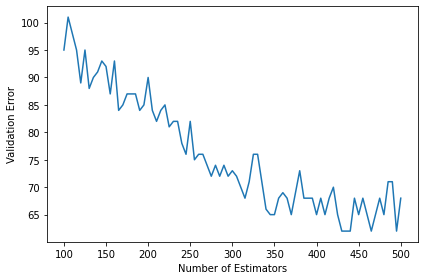

In [8]:
#TODO : Plot validation error versus number of estimators figure.
plt.plot(range(100, 501, 5), errors)
plt.xlabel('Number of Estimators')
plt.ylabel('Validation Error')
plt.tight_layout()

In [9]:
#TODO : Print the best number for estimators and minimum value for validation error.
n_estimators = 100 + 5 * np.argmin(errors)
print(f"Best number of estimators: {n_estimators} - Minimum validation error: {min(errors)}")

Best number of estimators: 430 - Minimum validation error: 62


### Weighted Error (10 points)

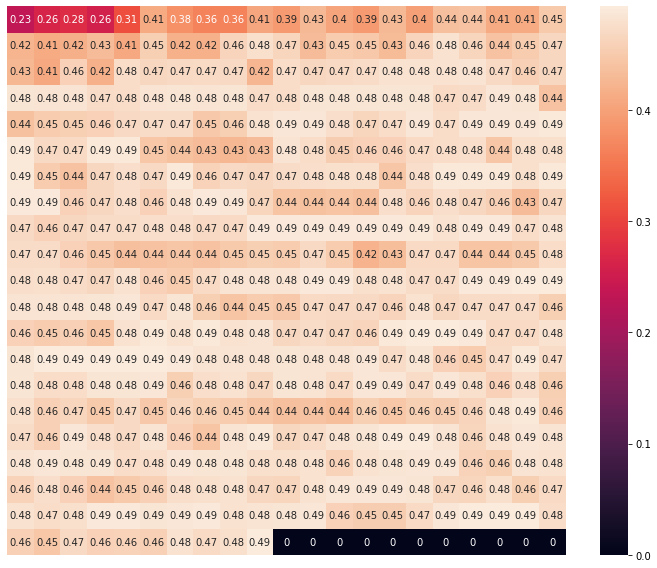

In [10]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.
model = AdaBoost()
model.fit(x_train, y_train, n_estimators)

A = model.training_errors
k = np.ceil(n_estimators ** .5).astype(int)
A = np.pad(A, (0, k ** 2 - len(model.training_errors))).reshape((k,k))

plt.figure(figsize=(10,8))
sns.heatmap(A, annot=True, xticklabels=False, yticklabels=False)
plt.tight_layout()

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5 points)

In [11]:
# New estimators have better accuracy than the first ones,
# so they should have bigger weight in our final decision.